## Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

##### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

##### What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 


## Variables:
##### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


## Obejective:

Predict the happiness score considering the factors mentioned in the dataset.

### Research questions

- How does happiness score change among regions and countries?
- How does the 6 features contribute to the happiness in a country?
- Which feature best explains or is highly correlated with happiness score? Does external factors like a good economy and less corruption always mean greater happiness or maybe more social related features like Family, Life Expectancy, Freedom, Generosity?


In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [167]:
# Setting style parameters for graphs
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
#plt.rcParams['figure.facecolor']='#FFE5B4'

## Data Exploration

In [168]:
data=pd.read_csv(r'C:\Users\JPGD\Documents\ANDREA GOMEZ\FLIP ROBO TECHNOLOGIES INTERNSHIP\Projects\Datasets\happiness_score_dataset.csv')
data.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [169]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [170]:
# Rename feature names
data=data.rename({'Happiness Rank':'Happiness_Rank', 'Happiness Score':'Happiness_Score',
       'Standard Error':'Standard_Error','Economy (GDP per Capita)':'GDP_per_Capita',
       'Health (Life Expectancy)':'Life_Expectancy','Trust (Government Corruption)':'Government_Corruption','Dystopia Residual':'Dystopia_Residual'},axis=1)
data

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [171]:
# Checking the dimension of the dataset
data.shape

(158, 12)

In [172]:
data.loc[data['Country']=='Togo']

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


This dataset contains 158 rows and 12 columns, out of which 1 is target variable ("Happiness Score") and the remaining 11 are independent variables.

In [173]:
# Checking data info (missing values/ data type)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                158 non-null    object 
 1   Region                 158 non-null    object 
 2   Happiness_Rank         158 non-null    int64  
 3   Happiness_Score        158 non-null    float64
 4   Standard_Error         158 non-null    float64
 5   GDP_per_Capita         158 non-null    float64
 6   Family                 158 non-null    float64
 7   Life_Expectancy        158 non-null    float64
 8   Freedom                158 non-null    float64
 9   Government_Corruption  158 non-null    float64
 10  Generosity             158 non-null    float64
 11  Dystopia_Residual      158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


This dataset does not have missing values.

In [174]:
# Checking the number of unique values in each column
data.nunique().to_frame("No. of unique values")

,No. of unique values
Country,158
Region,10
Happiness_Rank,157
Happiness_Score,157
Standard_Error,153
GDP_per_Capita,158
Family,158
Life_Expectancy,157
Freedom,158
Government_Corruption,157


The data above shows that most of the data per country is unique.

In [175]:
# Understanding the central tendencies of the numeric data using the .describe() method.
data.describe()

,Happiness_Rank,Happiness_Score,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


#### Observations
- The summary of the dataset shows that there are no missing values in any of the features.
- In all columns except for Happiness rank, a low standard deviation indicates that data are clustered around the mean.

In [176]:
# Checking missing values
data.isnull().sum()

Country                  0
Region                   0
Happiness_Rank           0
Happiness_Score          0
Standard_Error           0
GDP_per_Capita           0
Family                   0
Life_Expectancy          0
Freedom                  0
Government_Corruption    0
Generosity               0
Dystopia_Residual        0
dtype: int64

In [177]:
# Analyzing data per region

data.groupby(by=['Region']).mean()

,Happiness_Rank,Happiness_Score,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980008
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [178]:
# Separating Numerical and Categorical columns

#Checking for Categorical Columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
    
numeric_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numeric_col.append(i)
print("Numerical Columns: ",numeric_col)

Categorical Columns:  ['Country', 'Region']
Numerical Columns:  ['Happiness_Rank', 'Happiness_Score', 'Standard_Error', 'GDP_per_Capita', 'Family', 'Life_Expectancy', 'Freedom', 'Government_Corruption', 'Generosity', 'Dystopia_Residual']


In [179]:
# Dropping Happiness Rank column
data_nr=data.drop("Happiness_Rank",axis=1)

In [180]:
# Checking the unique values in target column
data['Happiness_Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

## Data Visualization

In [181]:
numeric_col

['Happiness_Rank',
 'Happiness_Score',
 'Standard_Error',
 'GDP_per_Capita',
 'Family',
 'Life_Expectancy',
 'Freedom',
 'Government_Corruption',
 'Generosity',
 'Dystopia_Residual']

<AxesSubplot:>

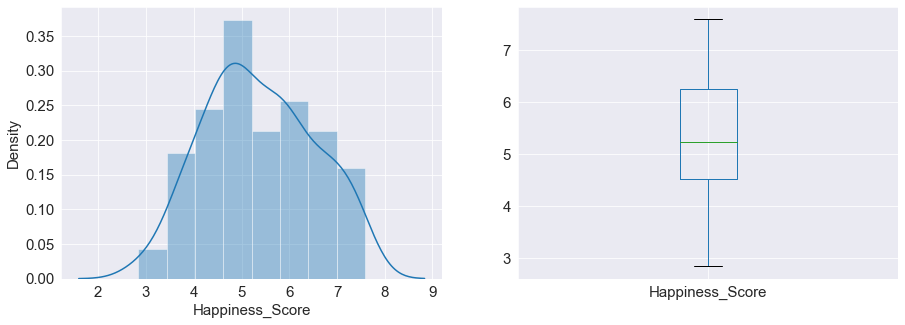

In [182]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Happiness_Score'])
plt.subplot(122)
data['Happiness_Score'].plot.box(figsize=(15,5))

<AxesSubplot:>

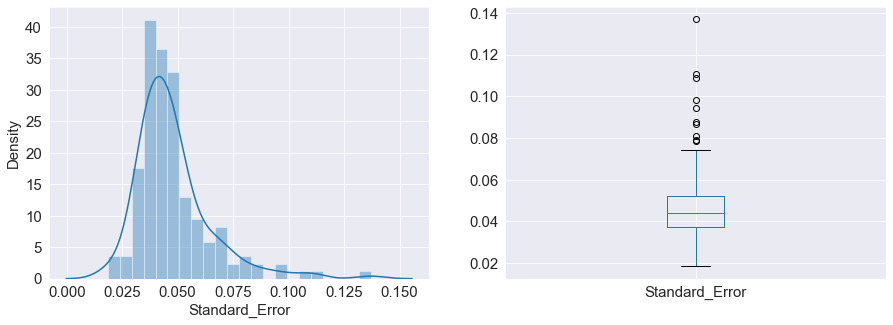

In [183]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Standard_Error'])
plt.subplot(122)
data['Standard_Error'].plot.box(figsize=(15,5))

<AxesSubplot:>

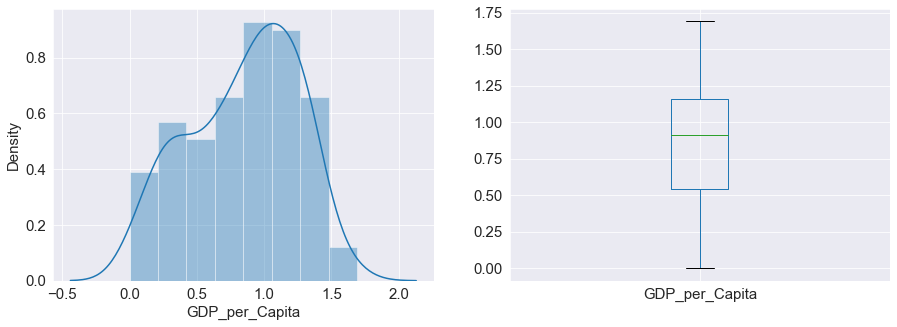

In [184]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['GDP_per_Capita'])
plt.subplot(122)
data['GDP_per_Capita'].plot.box(figsize=(15,5))

<AxesSubplot:>

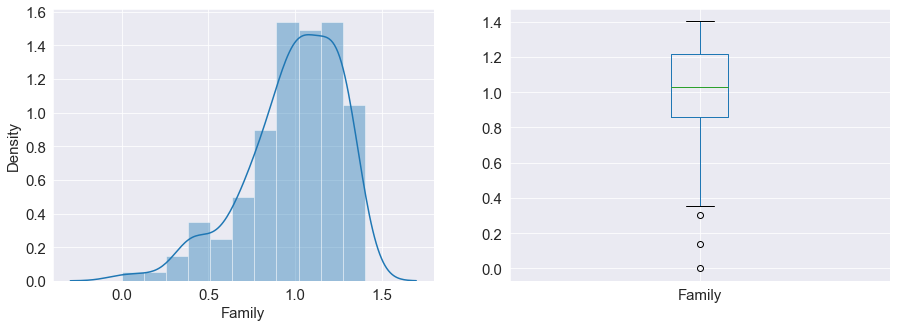

In [185]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Family'])
plt.subplot(122)
data['Family'].plot.box(figsize=(15,5))

<AxesSubplot:>

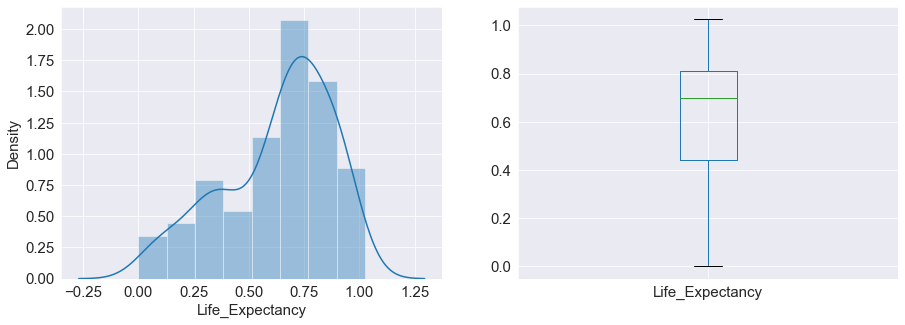

In [186]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Life_Expectancy'])
plt.subplot(122)
data['Life_Expectancy'].plot.box(figsize=(15,5))

<AxesSubplot:>

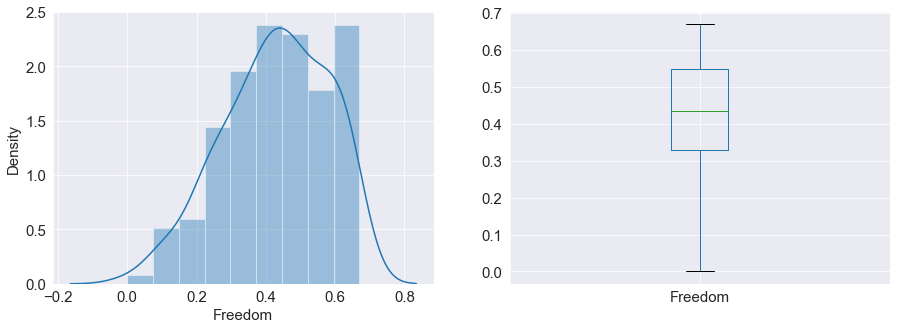

In [187]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Freedom'])
plt.subplot(122)
data['Freedom'].plot.box(figsize=(15,5))

<AxesSubplot:>

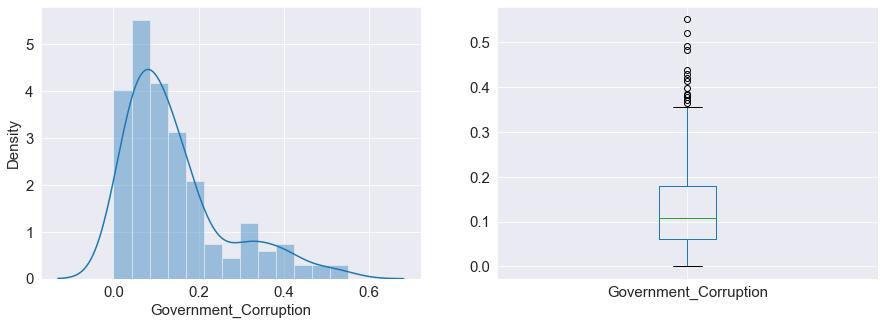

In [188]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Government_Corruption'])
plt.subplot(122)
data['Government_Corruption'].plot.box(figsize=(15,5))

<AxesSubplot:>

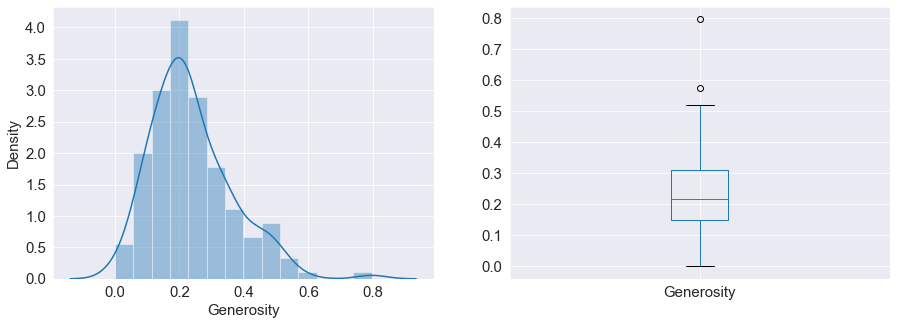

In [189]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Generosity'])
plt.subplot(122)
data['Generosity'].plot.box(figsize=(15,5))

<AxesSubplot:>

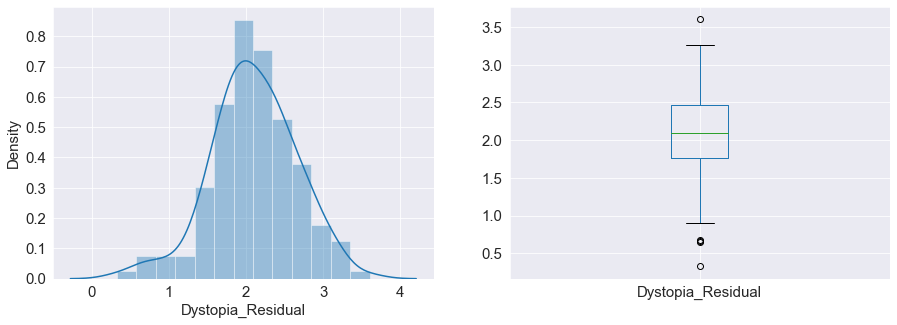

In [190]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Dystopia_Residual'])
plt.subplot(122)
data['Dystopia_Residual'].plot.box(figsize=(15,5))

Text(0, 0.5, 'GDP per Capita')

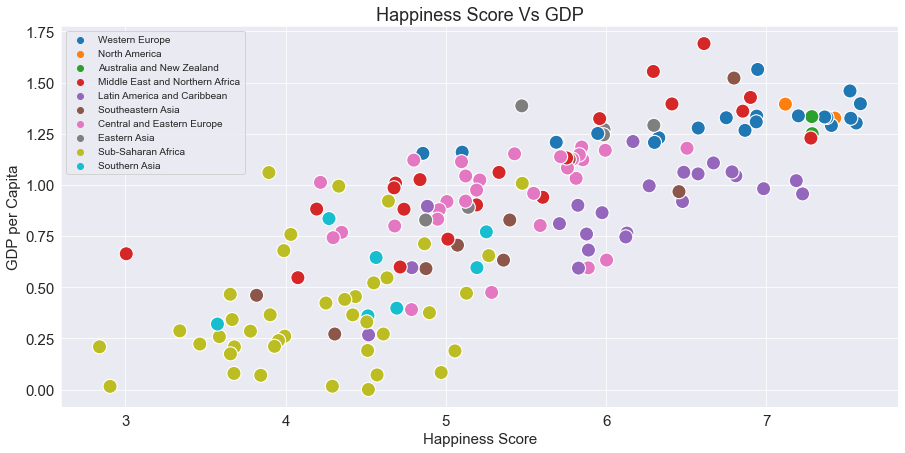

In [191]:
# Plotting Happiness Rank Vs GDP

plt.rcParams['figure.figsize']=(15,7)
plt.title('Happiness Score Vs GDP')
sns.scatterplot(x=data['Happiness_Score'],y=data['GDP_per_Capita'],hue=data['Region'],s=200) #s=size of the dots

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')

In [192]:
gdp_region=data.groupby('Region')['GDP_per_Capita'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP_per_Capita, dtype: float64

Text(0, 0.5, '')

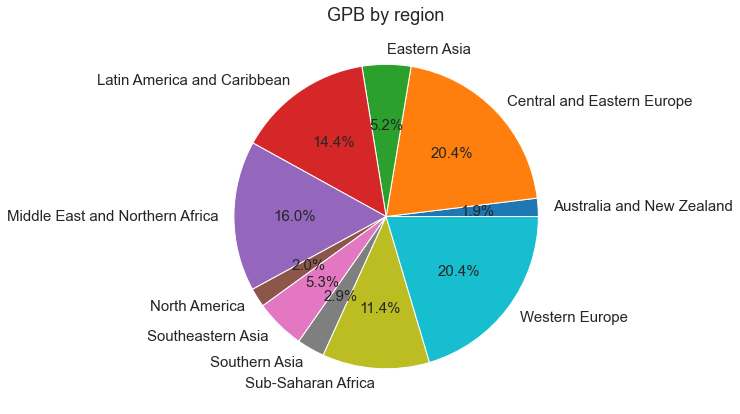

In [193]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GPB by region')
plt.ylabel('')

In [194]:
data.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'GDP_per_Capita', 'Family', 'Life_Expectancy',
       'Freedom', 'Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

Text(0, 0.5, 'GDP per Capita')

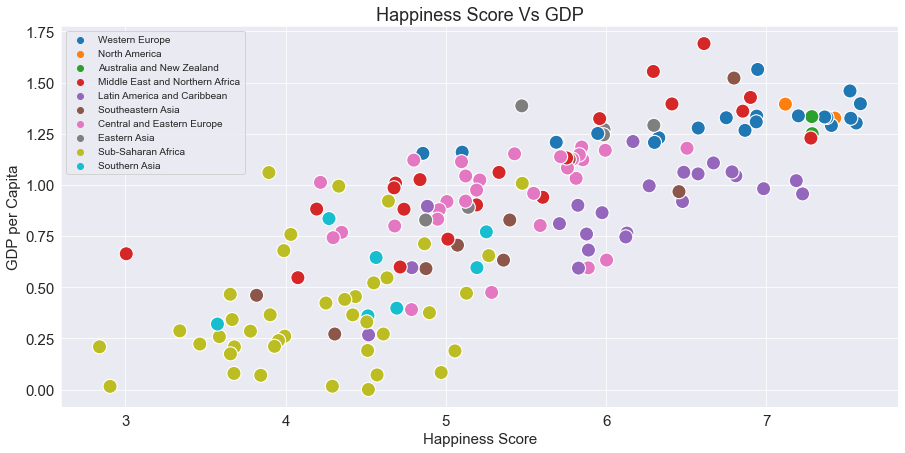

In [195]:
# Plotting Happiness Rank Vs GDP

plt.rcParams['figure.figsize']=(15,7)
plt.title('Happiness Score Vs GDP')
sns.scatterplot(x=data['Happiness_Score'],y=data['GDP_per_Capita'],hue=data['Region'],s=200) #s=size of the dots

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')

Text(0, 0.5, 'Family')

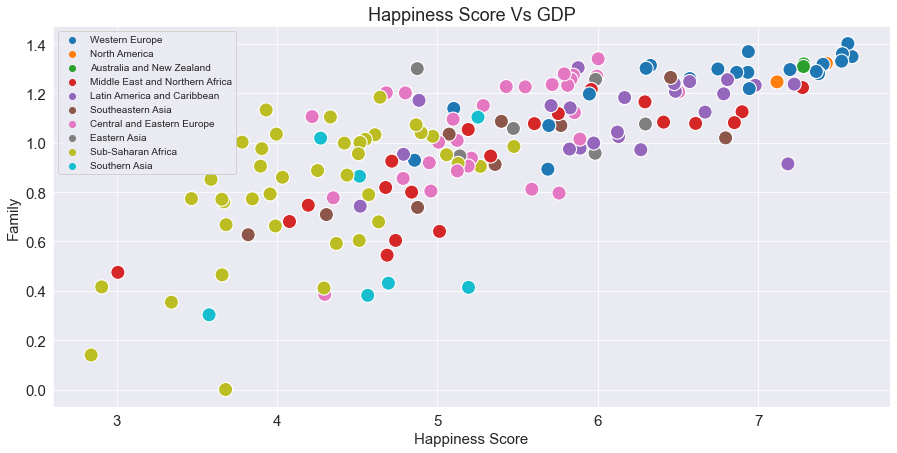

In [196]:
# Plotting Happiness Rank Vs Family

plt.rcParams['figure.figsize']=(15,7)
plt.title('Happiness Score Vs GDP')
sns.scatterplot(x=data['Happiness_Score'],y=data['Family'],hue=data['Region'],s=200) #s=size of the dots

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Family')

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP_per_Capita, dtype: float64


Text(0, 0.5, '')

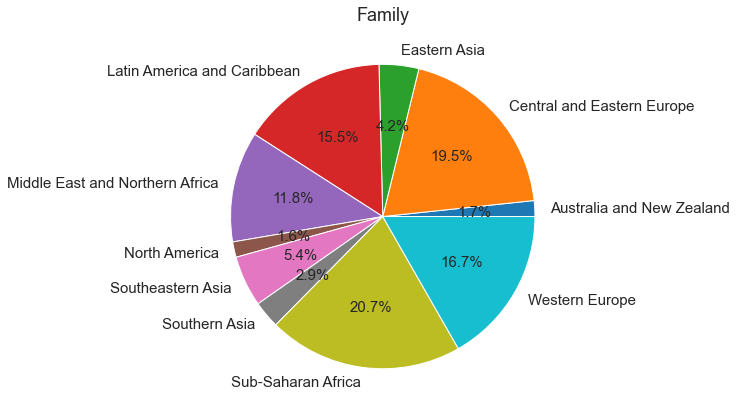

In [197]:
family=data.groupby('Region')['Family'].sum()
print(gdp_region)
family.plot.pie(autopct='%1.1f%%')
plt.title('Family')
plt.ylabel('')

Text(0, 0.5, 'Life_Expectancy')

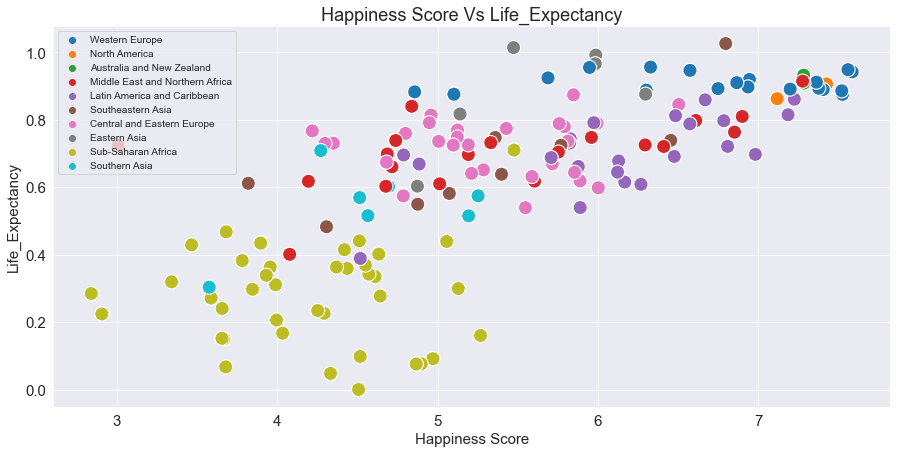

In [198]:
# Plotting Happiness Rank Vs Life Expectancy

plt.rcParams['figure.figsize']=(15,7)
plt.title('Happiness Score Vs Life_Expectancy')
sns.scatterplot(x=data['Happiness_Score'],y=data['Life_Expectancy'],hue=data['Region'],s=200) #s=size of the dots

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Life_Expectancy')

Region
Australia and New Zealand           1.83993
Central and Eastern Europe         20.84444
Eastern Asia                        5.26433
Latin America and Caribbean        15.48515
Middle East and Northern Africa    14.11231
North America                       1.76742
Southeastern Asia                   6.09621
Southern Asia                       3.78581
Sub-Saharan Africa                 11.29327
Western Europe                     19.09211
Name: Life_Expectancy, dtype: float64


Text(0, 0.5, '')

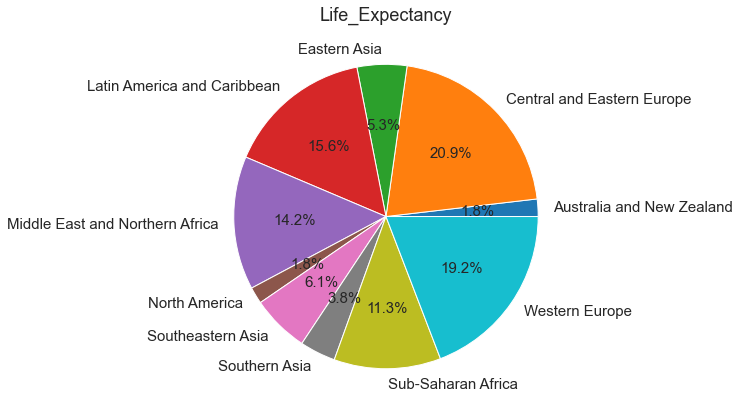

In [199]:
le=data.groupby('Region')['Life_Expectancy'].sum()
print(le)
le.plot.pie(autopct='%1.1f%%')
plt.title('Life_Expectancy')
plt.ylabel('')

Text(0, 0.5, 'Freedom')

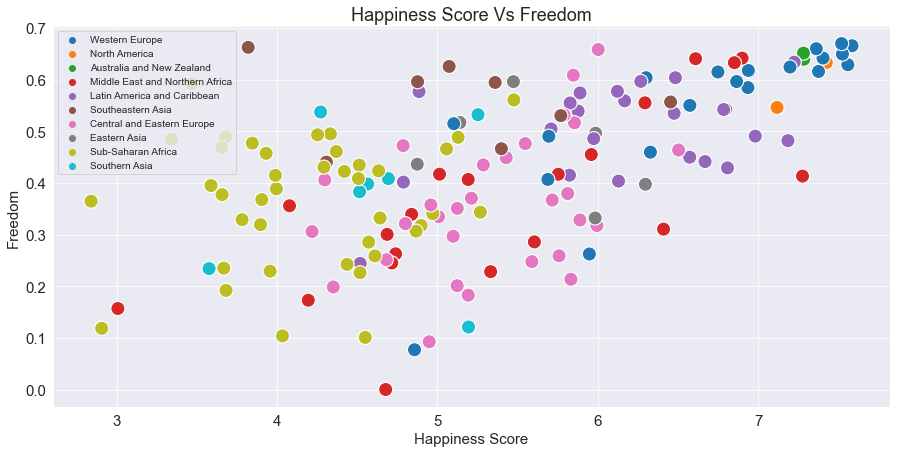

In [200]:
# Plotting Happiness Rank Vs Freedom

plt.rcParams['figure.figsize']=(15,7)
plt.title('Happiness Score Vs Freedom')
sns.scatterplot(x=data['Happiness_Score'],y=data['Freedom'],hue=data['Region'],s=200) #s=size of the dots

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')

Region
Australia and New Zealand           1.29062
Central and Eastern Europe         10.38979
Eastern Asia                        2.77494
Latin America and Caribbean        11.03827
Middle East and Northern Africa     7.23502
North America                       1.17901
Southeastern Asia                   5.01394
Southern Asia                       2.61336
Sub-Saharan Africa                 14.63776
Western Europe                     11.54845
Name: Freedom, dtype: float64


Text(0, 0.5, '')

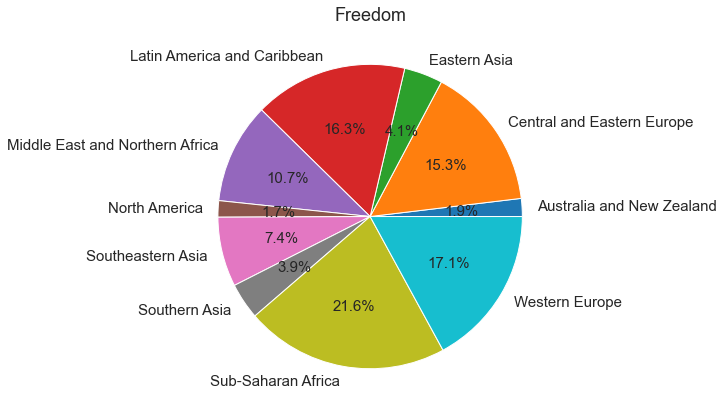

In [201]:
fr=data.groupby('Region')['Freedom'].sum()
print(fr)
fr.plot.pie(autopct='%1.1f%%')
plt.title('Freedom')
plt.ylabel('')

Text(0, 0.5, 'Government_Corruption')

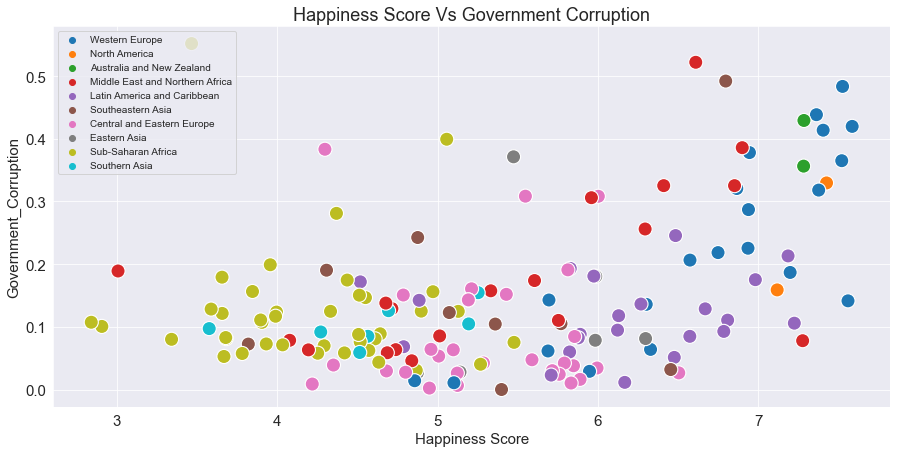

In [202]:
# Plotting Happiness Rank Vs Government Corruption

plt.rcParams['figure.figsize']=(15,7)
plt.title('Happiness Score Vs Government Corruption')
sns.scatterplot(x=data['Happiness_Score'],y=data['Government_Corruption'],hue=data['Region'],s=200) #s=size of the dots

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Government_Corruption')

Region
Australia and New Zealand          0.78559
Central and Eastern Europe         2.51354
Eastern Asia                       0.76617
Latin America and Caribbean        2.57778
Middle East and Northern Africa    3.63404
North America                      0.48847
Southeastern Asia                  1.36148
Southern Asia                      0.71775
Sub-Saharan Africa                 4.95511
Western Europe                     4.86072
Name: Government_Corruption, dtype: float64


Text(0, 0.5, '')

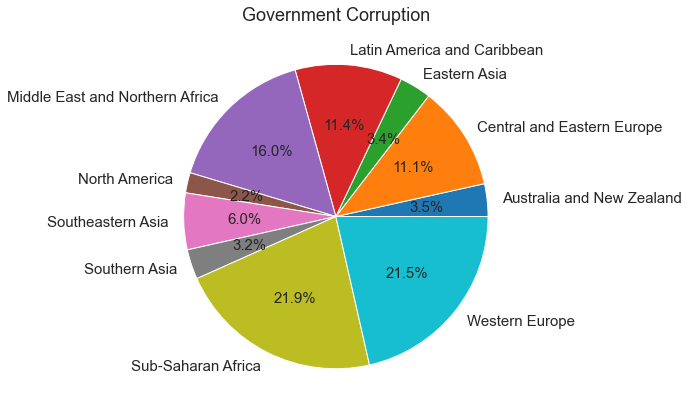

In [203]:
gc=data.groupby('Region')['Government_Corruption'].sum()
print(gc)
gc.plot.pie(autopct='%1.1f%%')
plt.title('Government Corruption')
plt.ylabel('')

Text(0, 0.5, 'Generosity')

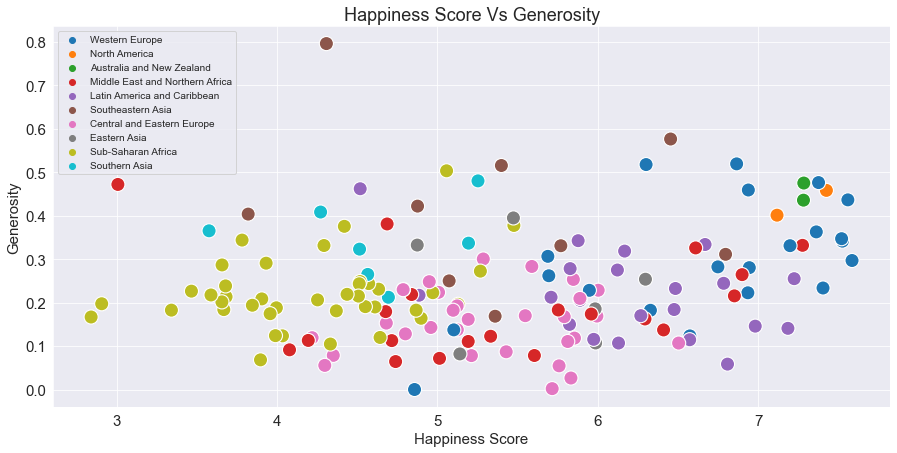

In [204]:
# Plotting Happiness Rank Vs Generosity

plt.rcParams['figure.figsize']=(15,7)
plt.title('Happiness Score Vs Generosity')
sns.scatterplot(x=data['Happiness_Score'],y=data['Generosity'],hue=data['Region'],s=200) #s=size of the dots

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')

Region
Australia and New Zealand          0.91063
Central and Eastern Europe         4.41565
Eastern Asia                       1.35531
Latin America and Caribbean        4.79133
Middle East and Northern Africa    3.80751
North America                      0.85916
Southeastern Asia                  3.77335
Southern Asia                      2.39000
Sub-Saharan Africa                 8.84547
Western Europe                     6.34428
Name: Generosity, dtype: float64


Text(0, 0.5, '')

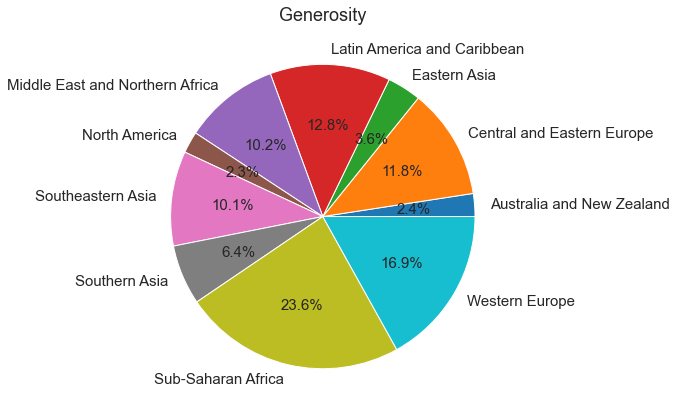

In [215]:
gn=data.groupby('Region')['Generosity'].sum()
print(gn)
gn.plot.pie(autopct='%1.1f%%')
plt.title('Generosity')
plt.ylabel('')

Text(0, 0.5, 'Dystopia Residual')

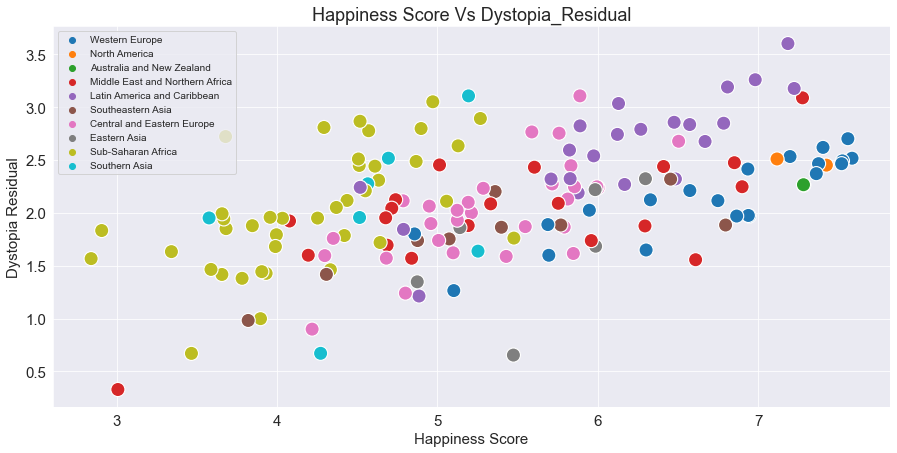

In [216]:
# Plotting Happiness Rank Vs Dystopia_Residual

plt.rcParams['figure.figsize']=(15,7)
plt.title('Happiness Score Vs Dystopia_Residual')
sns.scatterplot(x=data['Happiness_Score'],y=data['Dystopia_Residual'],hue=data['Region'],s=200) #s=size of the dots

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Dystopia Residual')

Region
Australia and New Zealand           4.53071
Central and Eastern Europe         58.62059
Eastern Asia                       10.08964
Latin America and Caribbean        57.69670
Middle East and Northern Africa    39.60017
North America                       4.96187
Southeastern Asia                  16.04718
Southern Asia                      14.11738
Sub-Saharan Africa                 80.79920
Western Europe                     45.17489
Name: Dystopia_Residual, dtype: float64


Text(0, 0.5, '')

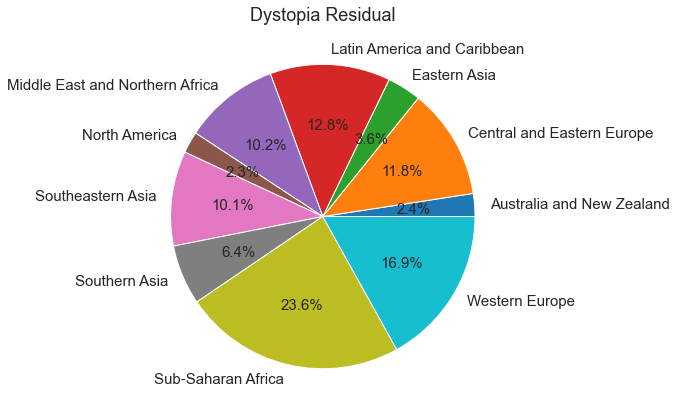

In [217]:
dr=data.groupby('Region')['Dystopia_Residual'].sum()
print(dr)
gn.plot.pie(autopct='%1.1f%%')
plt.title('Dystopia Residual')
plt.ylabel('')

In [218]:
# Factors contribution to Happiness Rank
# Happiness score is the sum of the six features plus the base dystopia with residual
# Sum all factors and happiness scores

#HappinessSUM=data.Happiness_Score.sum(axis=1)
GDPSum=(data.GDP_per_Capita)
FamilySum=(data.Family)
LifeExpectancySum=(data.Life_Expectancy)
FreedomSum=(data.Freedom)
CorruptionSum=(data.Government_Corruption)
GenerositySum=(data.Generosity)
DystopiaResidualSum=(data.Dystopia_Residual)

In [219]:
data2=data.drop('Standard_Error',axis=1)
#data2

In [220]:
# Create a dataframe of factors and get the percent contribution
# contribution = round(data3.div(data3.sum(axis=1), axis=0),3)
# contribution.index.names=['Rank']

In [221]:
# Create a dataframe of factors and get the percent contribution

contribution = round(data2.iloc[:,4:].div(data2.iloc[:,4:].sum(axis=1), axis=0),3)
contribution.insert(0,'Country',data2['Country'])
contribution.set_index(data2['Happiness_Rank'])

,Country,GDP_per_Capita,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
Happiness_Rank,,,,,,,,
1,Switzerland,0.184,0.178,0.124,0.088,0.055,0.039,0.332
2,Iceland,0.172,0.185,0.125,0.083,0.019,0.058,0.357
3,Denmark,0.176,0.181,0.116,0.086,0.064,0.045,0.331
4,Norway,0.194,0.177,0.118,0.089,0.049,0.046,0.328
5,Canada,0.179,0.178,0.122,0.085,0.044,0.062,0.330
...,...,...,...,...,...,...,...,...
154,Rwanda,0.064,0.223,0.124,0.171,0.159,0.065,0.193
155,Benin,0.086,0.106,0.096,0.145,0.024,0.055,0.489
156,Syria,0.221,0.158,0.240,0.052,0.063,0.157,0.109


In [222]:
# Explore the regions from the highest to the lowest Happiness Scores
hr=data2.groupby(['Region']).sum().sort_values('Happiness_Rank',ascending=False)
hr

,Happiness_Rank,Happiness_Score,GDP_per_Capita,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
Region,,,,,,,,,
Sub-Saharan Africa,5116,168.112,15.21892,32.36340,11.29327,14.63776,4.95511,8.84547,80.79920
Central and Eastern Europe,2291,154.655,27.33071,30.53823,20.84444,10.38979,2.51354,4.41565,58.62059
Middle East and Northern Africa,1552,108.138,21.33947,18.40980,14.11231,7.23502,3.63404,3.80751,39.60017
Latin America and Caribbean,1032,135.183,19.28994,24.30385,15.48515,11.03827,2.57778,4.79133,57.69670
Southern Asia,792,32.066,3.92340,4.51725,3.78581,2.61336,0.71775,2.39000,14.11738
Southeastern Asia,731,47.857,7.10149,8.46421,6.09621,5.01394,1.36148,3.77335,16.04718
Western Europe,620,140.482,27.27051,26.19334,19.09211,11.54845,4.86072,6.34428,45.17489
Eastern Asia,387,33.757,6.91068,6.59656,5.26433,2.77494,0.76617,1.35531,10.08964
North America,20,14.546,2.72080,2.56972,1.76742,1.17901,0.48847,0.85916,4.96187


In [223]:
# Create a dataframe of factors and get the percent per region

contributionRegion = round(hr.iloc[:,2:].div(hr.iloc[:,2:].sum(axis=1), axis=0),3)
contributionRegion
#contributionRegion.insert(0,'Region',hr['Region'])
#contributionRegion.set_index(hr['Happiness_Rank'])

,GDP_per_Capita,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
Region,,,,,,,
Sub-Saharan Africa,0.091,0.193,0.067,0.087,0.029,0.053,0.481
Central and Eastern Europe,0.177,0.197,0.135,0.067,0.016,0.029,0.379
Middle East and Northern Africa,0.197,0.170,0.131,0.067,0.034,0.035,0.366
Latin America and Caribbean,0.143,0.180,0.115,0.082,0.019,0.035,0.427
Southern Asia,0.122,0.141,0.118,0.082,0.022,0.075,0.440
Southeastern Asia,0.148,0.177,0.127,0.105,0.028,0.079,0.335
Western Europe,0.194,0.186,0.136,0.082,0.035,0.045,0.322
Eastern Asia,0.205,0.195,0.156,0.082,0.023,0.040,0.299
North America,0.187,0.177,0.122,0.081,0.034,0.059,0.341


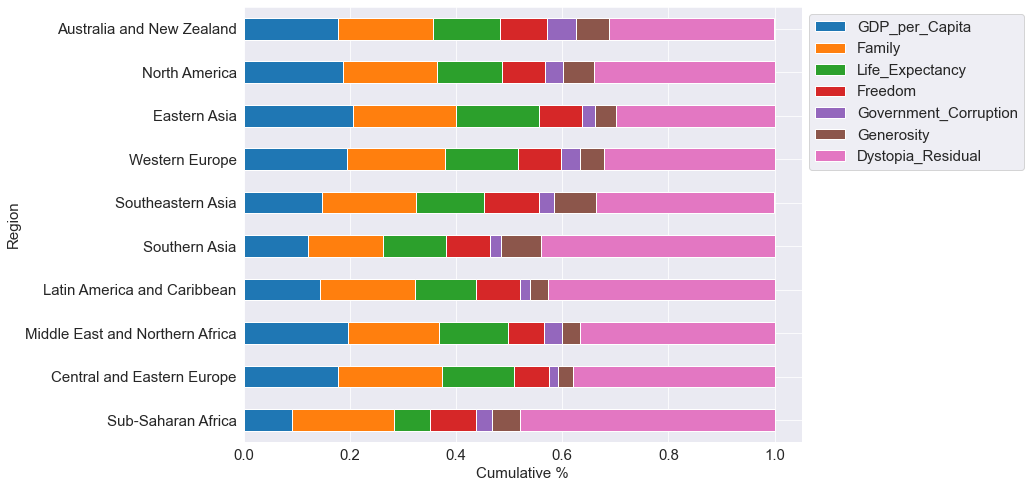

In [224]:
# Plot happiness contribution factors per region
contributionRegion.plot(kind='barh',stacked=True,figsize=(10,8))
plt.legend(contributionRegion,bbox_to_anchor=(1.0,1))
plt.xlabel('Cumulative %')
plt.show()

It is possible to see that in all regions the baseline plus unexplained (Dystopia Residual) contributes the most to the happiness scores, followed by life expectancy and GDP per Capita.

### Correlation between the target variable and independent variables

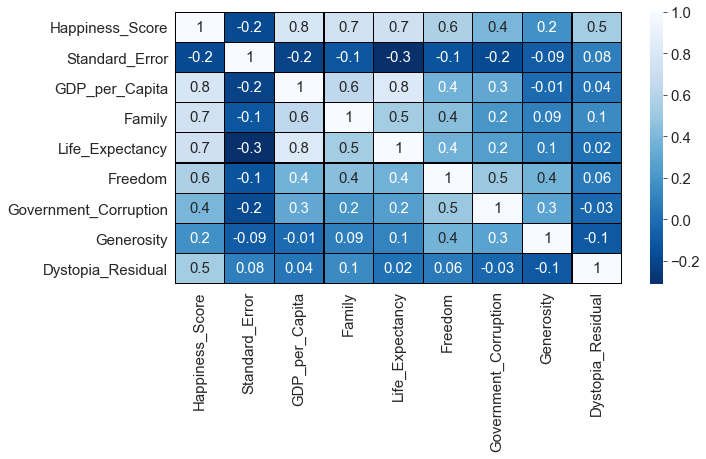

In [225]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data_nr.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

There is a strong positive correlation between the target variable "Happiness Score" and GDP, Family and Life Expectancy.

In [226]:
cor=data_nr.corr()
cor['Happiness_Score'].sort_values(ascending=False)

Happiness_Score          1.000000
GDP_per_Capita           0.780966
Family                   0.740605
Life_Expectancy          0.724200
Freedom                  0.568211
Dystopia_Residual        0.530474
Government_Corruption    0.395199
Generosity               0.180319
Standard_Error          -0.177254
Name: Happiness_Score, dtype: float64

### Visualizing the correlation between label and features using bar plot

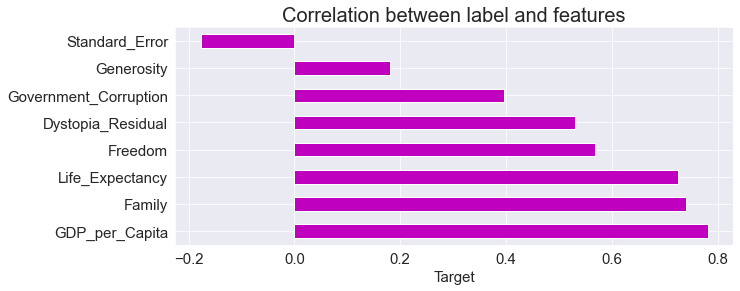

In [227]:
plt.figure(figsize=(10,4))
data_nr.corr()['Happiness_Score'].sort_values(ascending=False).drop(['Happiness_Score']).plot(kind='barh',color="m")
plt.xlabel('Feature',fontsize=15)
plt.xlabel('Target',fontsize=15)
plt.title("Correlation between label and features",fontsize=20)
plt.show()

### Checking for Outliers

In [228]:
from scipy.stats import zscore

out_features=data[['Happiness_Score',
 'Standard_Error',
 'GDP_per_Capita',
 'Family',
 'Life_Expectancy',
 'Freedom',
 'Government_Corruption',
 'Generosity',
 'Dystopia_Residual']]
z=np.abs(zscore(out_features))
z

array([[1.93736005, 0.80592569, 1.36962124, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 0.05588945, 1.13522625, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 0.8544869 , 1.19286069, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.13253425, 0.45524543, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.26396166, 2.06756644, ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.13418227, 1.58633379, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [229]:
# Threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))

In [230]:
dataO=data[(z<3).all(axis=1)]
dataO.shape

(149, 12)

In [231]:
# Shape of Old and New DataFrame
print("Old DataFrame - ",data.shape[0])
print("New DataFrame - ",dataO.shape[0])

Old DataFrame -  158
New DataFrame -  149


In [232]:
print("Data Loss Percentage - ",((data.shape[0]-dataO.shape[0])/data.shape[0]*100))

Data Loss Percentage -  5.69620253164557


In [233]:
import operator

# 1st quantile
Q1=out_features.quantile(0.25)


# 3rd quantile
Q3=out_features.quantile(0.75)

# IQR
IQR=Q3-Q1
dataIQR=data[operator.invert(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1))]

In [234]:
dataIQR.shape

(126, 12)

In [235]:
print("Data Loss Percentage after removing outliers with IQR method - ",((data.shape[0]-dataIQR.shape[0])/data.shape[0])*100)

Data Loss Percentage after removing outliers with IQR method -  20.253164556962027


I'll use the Z method to remove outliers, since the % loss is less.

### Checking for skewness

In [236]:
dataO.skew()

Happiness_Rank           0.003268
Happiness_Score          0.169740
Standard_Error           1.243048
GDP_per_Capita          -0.390657
Family                  -0.811340
Life_Expectancy         -0.747711
Freedom                 -0.400867
Government_Corruption    1.272530
Generosity               0.654710
Dystopia_Residual       -0.021144
dtype: float64

In [237]:
# Removing skewness using cuberoot method
# We do not do this with categorical data.

dataO['Government_Corruption']=np.cbrt(dataO['Government_Corruption'])

In [238]:
dataO.skew()

Happiness_Rank           0.003268
Happiness_Score          0.169740
Standard_Error           1.243048
GDP_per_Capita          -0.390657
Family                  -0.811340
Life_Expectancy         -0.747711
Freedom                 -0.400867
Government_Corruption   -0.064568
Generosity               0.654710
Dystopia_Residual       -0.021144
dtype: float64

<AxesSubplot:xlabel='Government_Corruption', ylabel='Density'>

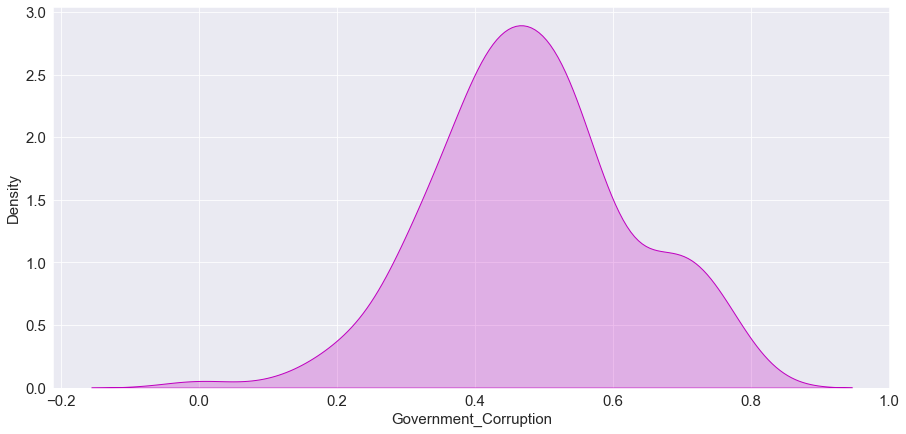

In [239]:
# Let's visualize how the data has been distributed in Government_Corruption after removing skewness.
sns.distplot(dataO['Government_Corruption'],color="m",kde_kws={"shade":True},hist=False)

### Encoding categorical columns

In [240]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in dataO.columns:
    if dataO[i].dtypes=="object":
        dataO[i]=OE.fit_transform(dataO[i].values.reshape(-1,1)) # We are fitting the data so that it can find out the variance, the different patterns and after that it is transforming the data.
dataO

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,129.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.748756,0.29678,2.51738
1,57.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.521036,0.43630,2.70201
2,36.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.784910,0.34139,2.49204
3,101.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.714677,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.690742,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,65.0,8.0,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.563805,0.20165,1.41723
151,20.0,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.504388,0.21747,1.46494
152,0.0,7.0,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.459770,0.36510,1.95210
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.431066,0.18260,1.63328


### Separating features and label

In [241]:
dataO=dataO.drop("Happiness_Rank",axis=1)

In [81]:
x=dataO.drop("Happiness_Score",axis=1)
y=dataO["Happiness_Score"]

In [242]:
dataO.nunique().to_frame("No. of unique values")

,No. of unique values
Country,149
Region,10
Happiness_Score,148
Standard_Error,144
GDP_per_Capita,149
Family,149
Life_Expectancy,148
Freedom,149
Government_Corruption,148
Generosity,149


### Feature Scaling using Standard Scalarization

In [243]:
#dataO.loc[data['Country']=='Denmark']

In [244]:
x

,Country,Region,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,1.278724,1.296837,-0.866786,1.381916,1.357879,1.235390,1.583704,1.886835,0.546305,0.756876
1,-0.395242,1.296837,0.185669,1.138324,1.567882,1.261541,1.338953,0.279412,1.713898,1.109300
2,-0.883482,1.296837,-0.926089,1.198220,1.401974,0.962900,1.476027,2.142033,0.919630,0.708507
3,0.627737,1.296837,-0.531687,1.543526,1.283947,1.006023,1.611371,1.646273,0.966495,0.657485
4,-1.162476,-0.026647,-0.765327,1.200315,1.250726,1.089333,1.366887,1.477326,1.896418,0.631620
...,...,...,...,...,...,...,...,...,...,...
144,-0.209246,0.965966,0.369294,-1.026255,-0.945943,-1.985941,0.274090,0.581308,-0.249803,-1.343100
145,-1.255474,0.965966,-0.214450,-1.562163,-0.624365,-1.498813,-0.216276,0.161899,-0.117411,-1.252030
146,-1.720465,0.635095,-1.100427,-1.402596,-2.811354,-1.367851,-1.285662,-0.153050,1.118051,-0.322135
147,-1.418221,0.965966,-0.691734,-1.488379,-2.608163,-1.303594,0.379439,-0.355660,-0.409226,-0.930702


In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Country,Region,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,1.278724,1.296837,-0.866786,1.381916,1.357879,1.235390,1.583704,1.886835,0.546305,0.756876
1,-0.395242,1.296837,0.185669,1.138324,1.567882,1.261541,1.338953,0.279412,1.713898,1.109300
2,-0.883482,1.296837,-0.926089,1.198220,1.401974,0.962900,1.476027,2.142033,0.919630,0.708507
3,0.627737,1.296837,-0.531687,1.543526,1.283947,1.006023,1.611371,1.646273,0.966495,0.657485
4,-1.162476,-0.026647,-0.765327,1.200315,1.250726,1.089333,1.366887,1.477326,1.896418,0.631620
...,...,...,...,...,...,...,...,...,...,...
144,-0.209246,0.965966,0.369294,-1.026255,-0.945943,-1.985941,0.274090,0.581308,-0.249803,-1.343100
145,-1.255474,0.965966,-0.214450,-1.562163,-0.624365,-1.498813,-0.216276,0.161899,-0.117411,-1.252030
146,-1.720465,0.635095,-1.100427,-1.402596,-2.811354,-1.367851,-1.285662,-0.153050,1.118051,-0.322135
147,-1.418221,0.965966,-0.691734,-1.488379,-2.608163,-1.303594,0.379439,-0.355660,-0.409226,-0.930702


### Checking Variance Inflation Factor

In [85]:
# Finding the Variance Inflation Factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

vif["VIF values"]=[variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.061896,Country
1,1.433053,Region
2,1.187985,Standard_Error
3,4.209302,GDP_per_Capita
4,2.038002,Family
5,3.991050,Life_Expectancy
6,1.933197,Freedom
7,1.418233,Government_Corruption
8,1.461088,Generosity
9,1.044343,Dystopia_Residual


There is no multicollinearity issues in the dataset.

## Modelling

#### Finding the best random state

In [86]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

#### Creating train test split

In [87]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximun r2 score is ",maxAccu, "on random_state",maxRS)

Maximun r2 score is  0.9994914532463502 on random_state 69


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

### Algorithms

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR

In [116]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
LR_r=r2_score(y_test,pred_LR)
LR_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',LR_r)
print('R2 Score on training data:',LR_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 Score: 0.9994914532463502
R2 Score on training data: 99.87106572310944
Mean Absolute Error: 0.020288420717361404
Mean Squared Error: 0.0006454260361152591
Root Mean Squared Error: 0.025405236391642945


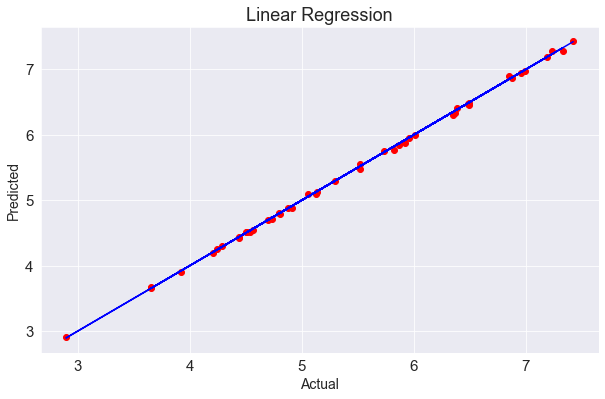

In [92]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [117]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
RFR_r=r2_score(y_test,pred_RFR)
RFR_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',RFR_r)
print('R2 Score on training data:',RFR_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 Score: 0.892298874151657
R2 Score on training data: 98.60952833137688
Mean Absolute Error: 0.2909995555555554
Mean Squared Error: 0.13668971484444445
Root Mean Squared Error: 0.36971572166252875


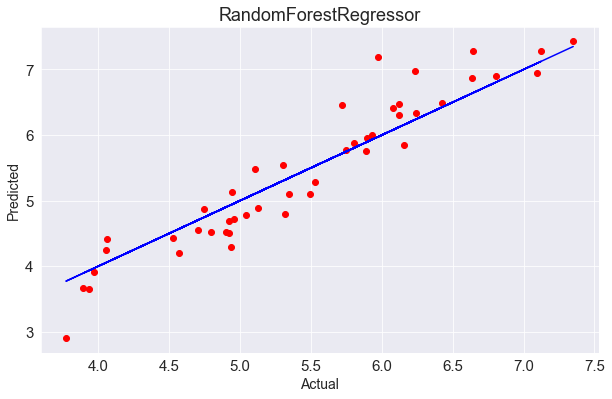

In [99]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_RFR,y=y_test,color='r')
plt.plot(pred_RFR,pred_RFR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("RandomForestRegressor",fontsize=18)
plt.show()

In [118]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
knn_r=r2_score(y_test,pred_knn)
knn_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',knn_r)
print('R2 Score on training data:',knn_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score: 0.884689853763591
R2 Score on training data: 91.89503326551758
Mean Absolute Error: 0.2933200000000001
Mean Squared Error: 0.14634676177777786
Root Mean Squared Error: 0.3825529529068856


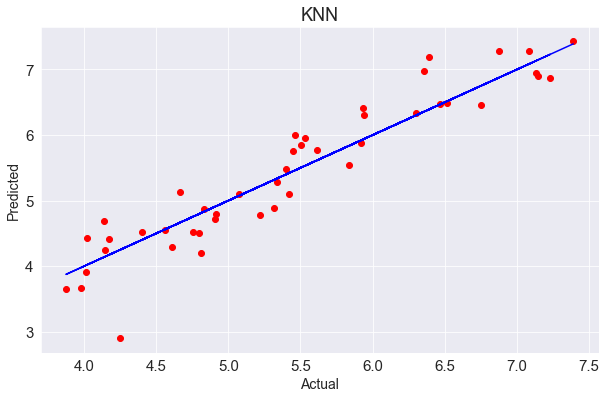

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_knn,y=y_test,color='r')
plt.plot(pred_knn,pred_knn,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("KNN",fontsize=18)
plt.show()

In [119]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
GBR_r=r2_score(y_test,pred_GBR)
GBR_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',GBR_r)
print('R2 Score on training data:',GBR_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score: 0.9167108629426791
R2 Score on training data: 99.9635001889074
Mean Absolute Error: 0.2526364761268616
Mean Squared Error: 0.10570705091826292
Root Mean Squared Error: 0.32512620767674655


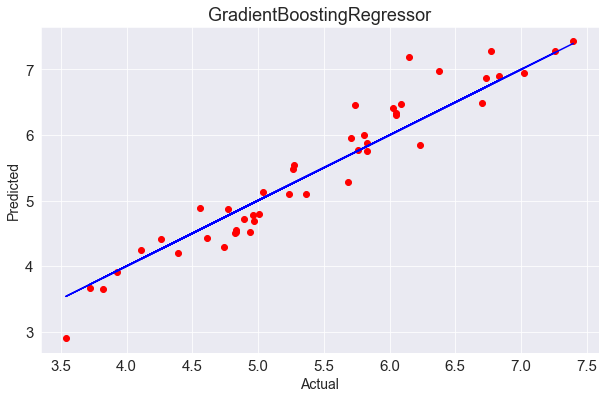

In [101]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_GBR,y=y_test,color='r')
plt.plot(pred_GBR,pred_GBR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("GradientBoostingRegressor",fontsize=18)
plt.show()

In [120]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
lasso_r=r2_score(y_test,pred_lasso)
lasso_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',lasso_r)
print('R2 Score on training data:',lasso_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 Score: -0.00012875752879892843
R2 Score on training data: 0.0
Mean Absolute Error: 0.9730166666666663
Mean Squared Error: 1.2693211291666666
Root Mean Squared Error: 1.1266415264700067


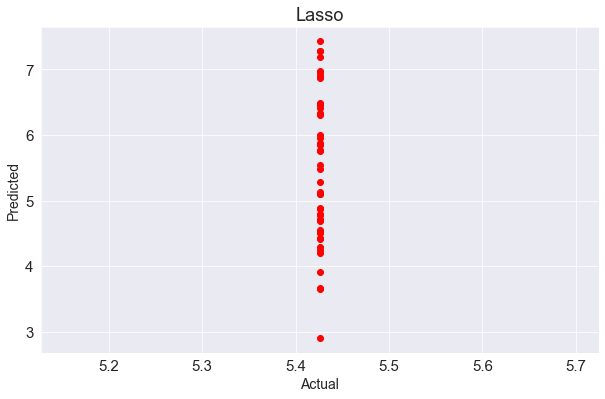

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_lasso,y=y_test,color='r')
plt.plot(pred_lasso,pred_lasso,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Lasso",fontsize=18)
plt.show()

In [121]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_ridge=rd.predict(x_test)
pred_train=rd.predict(x_train)
ridge_r=r2_score(y_test,pred_ridge)
ridge_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',ridge_r)
print('R2 Score on training data:',ridge_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ridge))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ridge))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 Score: 0.9994789871458427
R2 Score on training data: 99.86747907852467
Mean Absolute Error: 0.020512491511365274
Mean Squared Error: 0.000661247483757291
Root Mean Squared Error: 0.025714732815203253


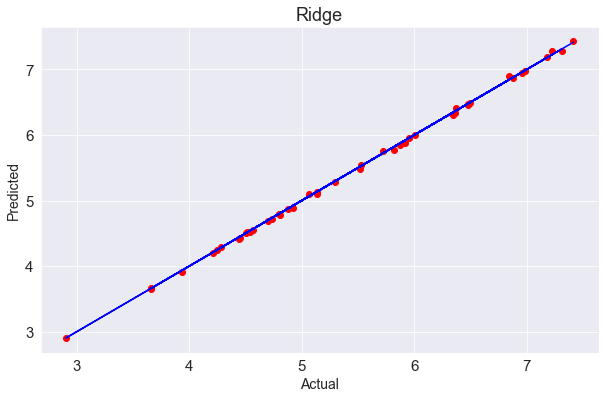

In [106]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_ridge,y=y_test,color='r')
plt.plot(pred_ridge,pred_ridge,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Ridge",fontsize=18)
plt.show()

In [122]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
dtr_r=r2_score(y_test,pred_DTR)
dtr_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',dtr_r)
print('R2 Score on training data:',dtr_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 Score: 0.7389370250616536
R2 Score on training data: 100.0
Mean Absolute Error: 0.47111111111111115
Mean Squared Error: 0.331330088888889
Root Mean Squared Error: 0.5756127942366196


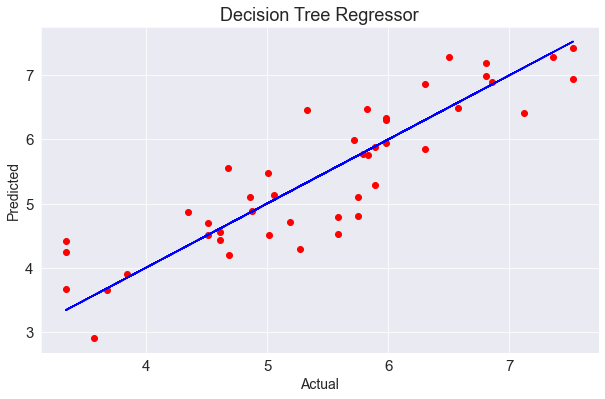

In [108]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_DTR,y=y_test,color='r')
plt.plot(pred_DTR,pred_DTR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Decision Tree Regressor",fontsize=18)
plt.show()

In [123]:
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
svr_r=r2_score(y_test,pred_SVR)
svr_rtd=r2_score(y_train, pred_train)*100
print('R2 Score:',svr_r)
print('R2 Score on training data:',svr_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_SVR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_SVR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2 Score: 0.8958552254131015
R2 Score on training data: 99.2993395593405
Mean Absolute Error: 0.22431682127891972
Mean Squared Error: 0.13217614420175638
Root Mean Squared Error: 0.36356037215537723


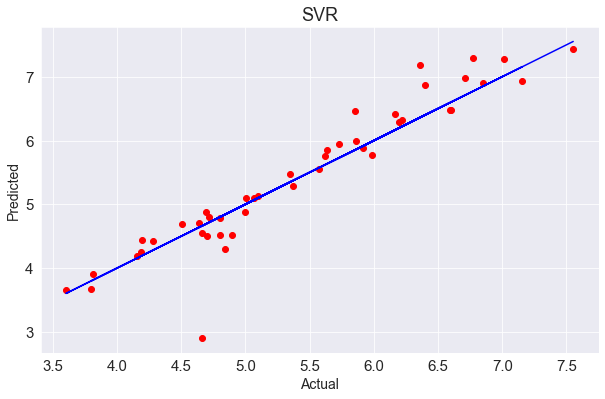

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_SVR,y=y_test,color='r')
plt.plot(pred_SVR,pred_SVR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("SVR",fontsize=18)
plt.show()

In [126]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict(x_test)
pred_train=etr.predict(x_train)
etr_r=r2_score(y_test,pred_ETR)
etr_rtd=r2_score(y_train, pred_train)*100

print('R2 Score:',etr_r)
print('R2 Score on training data:',etr_rtd)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2 Score: 0.9155900270494708
R2 Score on training data: 100.0
Mean Absolute Error: 0.24447866666666696
Mean Squared Error: 0.1071295684399999
Root Mean Squared Error: 0.3273065358956339


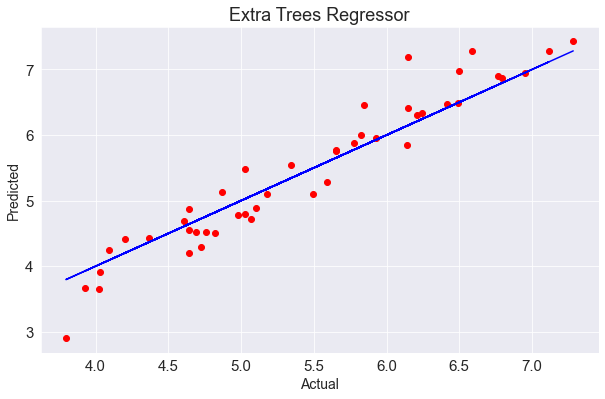

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_ETR,y=y_test,color='r')
plt.plot(pred_ETR,pred_ETR,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Extra Trees Regressor",fontsize=18)
plt.show()

In [132]:
# Checking all algorithm results

results_alg=pd.DataFrame({'Model':['LinearRegression','RandomForestRegressor','KNeighborsRegressor','GradientBoostingRegressor',
'Lasso','Ridge','DecisionTreeRegressor','SVR','ExtraTreesRegressor'],'R2 Score':[LR_r,RFR_r,knn_r,GBR_r,lasso_r,ridge_r,dtr_r,svr_r,etr_r],'R2 Score on Training Data':[LR_rtd,RFR_rtd,knn_rtd,GBR_rtd,lasso_rtd,ridge_rtd,dtr_rtd,svr_rtd,etr_rtd]})
results_alg.index+=1
results_alg

,Model,R2 Score,R2 Score on Training Data
1,LinearRegression,0.999491,99.871066
2,RandomForestRegressor,0.892299,98.609528
3,KNeighborsRegressor,0.884690,91.895033
4,GradientBoostingRegressor,0.916711,99.963500
5,Lasso,-0.000129,0.000000
6,Ridge,0.999479,99.867479
7,DecisionTreeRegressor,0.738937,100.000000
8,SVR,0.895855,99.299340
9,ExtraTreesRegressor,0.915590,100.000000


There is evidence of overfitting.

### Cross Validation Score

In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
# Checking CV Score
score=cross_val_score(LR,x,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.94596463 0.97985921 0.93899407 0.95361627 0.99250111]
0.962187057631502
Difference between R2 Score and Cross Validation Score is 3.730439561484822


In [135]:
# Checking CV Score
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[-8.74277753 -0.91381421 -1.19020873 -3.11728809 -6.31916528]
-4.056650768257784
Difference between R2 Score and Cross Validation Score is 494.8949642409441


In [136]:
# Checking CV Score
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_knn)-score2.mean())*100)

[-10.50755367  -2.57048008  -2.49439711  -8.34874654  -5.51381751]
-5.886998983342677
Difference between R2 Score and Cross Validation Score is 677.1688837106268


In [137]:
# Checking CV Score
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_GBR)-score3.mean())*100)

[-4.75128471 -0.12505221 -1.14858174 -2.53814018 -4.44097882]
-2.6008075317899726
Difference between R2 Score and Cross Validation Score is 351.7518394732652


In [138]:
# Checking CV Score
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_lasso)-score4.mean())*100)

[-42.37117014 -11.06215836  -0.30321946 -32.72956581 -29.0315447 ]
-23.099531692553747
Difference between R2 Score and Cross Validation Score is 2309.9402935024946


In [139]:
# Checking CV Score
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_ridge)-score5.mean())*100)

[0.9188476  0.98058133 0.93790991 0.94986104 0.99091096]
0.9556221677767617
Difference between R2 Score and Cross Validation Score is 4.385681936908103


In [140]:
# Checking CV Score
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_DTR)-score6.mean())*100)

[ -9.03461974 -11.0320633   -8.25080698 -11.48827919  -5.59696924]
-9.08054769208634
Difference between R2 Score and Cross Validation Score is 981.9484717147993


In [141]:
# Checking CV Score
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_SVR)-score7.mean())*100)

[-10.16421741  -0.02505387   0.83509935  -1.24222167  -5.68570979]
-3.2564206789504397
Difference between R2 Score and Cross Validation Score is 415.2275904363541


In [142]:
# Checking CV Score
score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print("Difference between R2 Score and Cross Validation Score is",(r2_score(y_test,pred_ETR)-score8.mean())*100)

[-7.4303663   0.17732974 -1.27935126 -1.78455723 -5.67521735]
-3.1984324810777287
Difference between R2 Score and Cross Validation Score is 411.4022508127199


The difference between R2 Score and Cross Validation Score, shows that most of the models are overfitting. However, the best model is the Linear Regression.

### Hyperparameter Tuning

In [156]:
# To increase the performance of the model
# Linear Regression

from sklearn.model_selection import GridSearchCV

# Always take at least 5 parameters
parameters={'fit_intercept':[True,False], 'copy_X':[True,False], 'n_jobs':[5,10,12,20,25,100,None], 'positive':[False,True]}

In [157]:
gscv=GridSearchCV(LinearRegression(),parameters,cv=5)

In [158]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [5, 10, 12, 20, 25, 100, None],
                         'positive': [False, True]})

In [159]:
gscv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 5, 'positive': True}

In [160]:
Model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=5, positive=True)

In [161]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2 Score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 0.9994831047955542
Mean Absolute Error: 0.020272063212788044
Mean Squared Error: 0.0006560215368559399
Root Mean Squared Error: 0.025612917382757082


### Saving the Model

In [163]:
# Saving the model using .pkl
import pickle
filename="World Happiness Report.pkl"
pickle.dump(Model,open(filename,'wb'))

In [164]:
import pickle
loaded_model=pickle.load(open("World Happiness Report.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result*100)

99.94831047955543


## Get Predictions

In [165]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
Predicted,7.42266,5.819406,6.877982,4.540145,6.485368,6.382535,4.915155,4.799113,4.207336,6.489645,...,4.434658,7.189439,5.517036,5.916619,2.89842,6.995626,4.508627,5.060636,6.493098,5.869939
Original,7.42700,5.770000,6.867000,4.518000,6.477000,6.411000,4.885000,4.786000,4.194000,6.455000,...,4.419000,7.187000,5.548000,5.878000,2.90500,6.983000,4.517000,5.102000,6.485000,5.848000


In [ ]:
#data.iloc[:,1:].sum(axis=1)AA

In [ ]:
# total=contribution.iloc[:,1:].sum(axis=1)
# total

In [ ]:
#contribution.iloc[:,1:]